In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(".."))  
from src.graficos import criar_boxplot
sns.set_theme()

In [2]:
data = pd.read_csv("../data/cleaned.csv")

In [3]:
data

,data,dia_semana,pontuacao,regularidade,duracao,sono_leve,sono_leve_perc,sono_profundo,sono_profundo_perc,REM,REM_perc,tempo_acordado,vezes_acordado
0,2025-05-01,quinta-feira,72,90,478,337,70.50,39,8.16,102,21.34,6,3
1,2025-05-02,sexta-feira,93,90,464,314,67.67,80,17.24,70,15.09,6,1
2,2025-05-03,sábado,80,90,539,360,66.79,83,15.40,96,17.81,12,4
3,2025-05-04,domingo,77,95,515,338,65.63,72,13.98,105,20.39,29,4
4,2025-05-05,segunda-feira,85,89,428,258,60.28,72,16.82,98,22.90,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2025-07-08,terça-feira,78,71,519,338,65.13,63,12.14,118,22.74,8,3
69,2025-07-09,quarta-feira,82,75,505,358,70.89,73,14.46,74,14.65,5,3
70,2025-07-10,quinta-feira,76,74,472,324,68.64,58,12.29,90,19.07,4,2
71,2025-07-11,sexta-feira,85,77,483,309,63.98,76,15.73,98,20.29,9,2


Criação de lista "Métricas"

In [4]:
metricas = ["pontuacao","regularidade", 
            "duracao", "sono_leve","sono_leve_perc", 
            "sono_profundo", "sono_profundo_perc", "REM", "REM_perc", 
            "tempo_acordado", "vezes_acordado"]

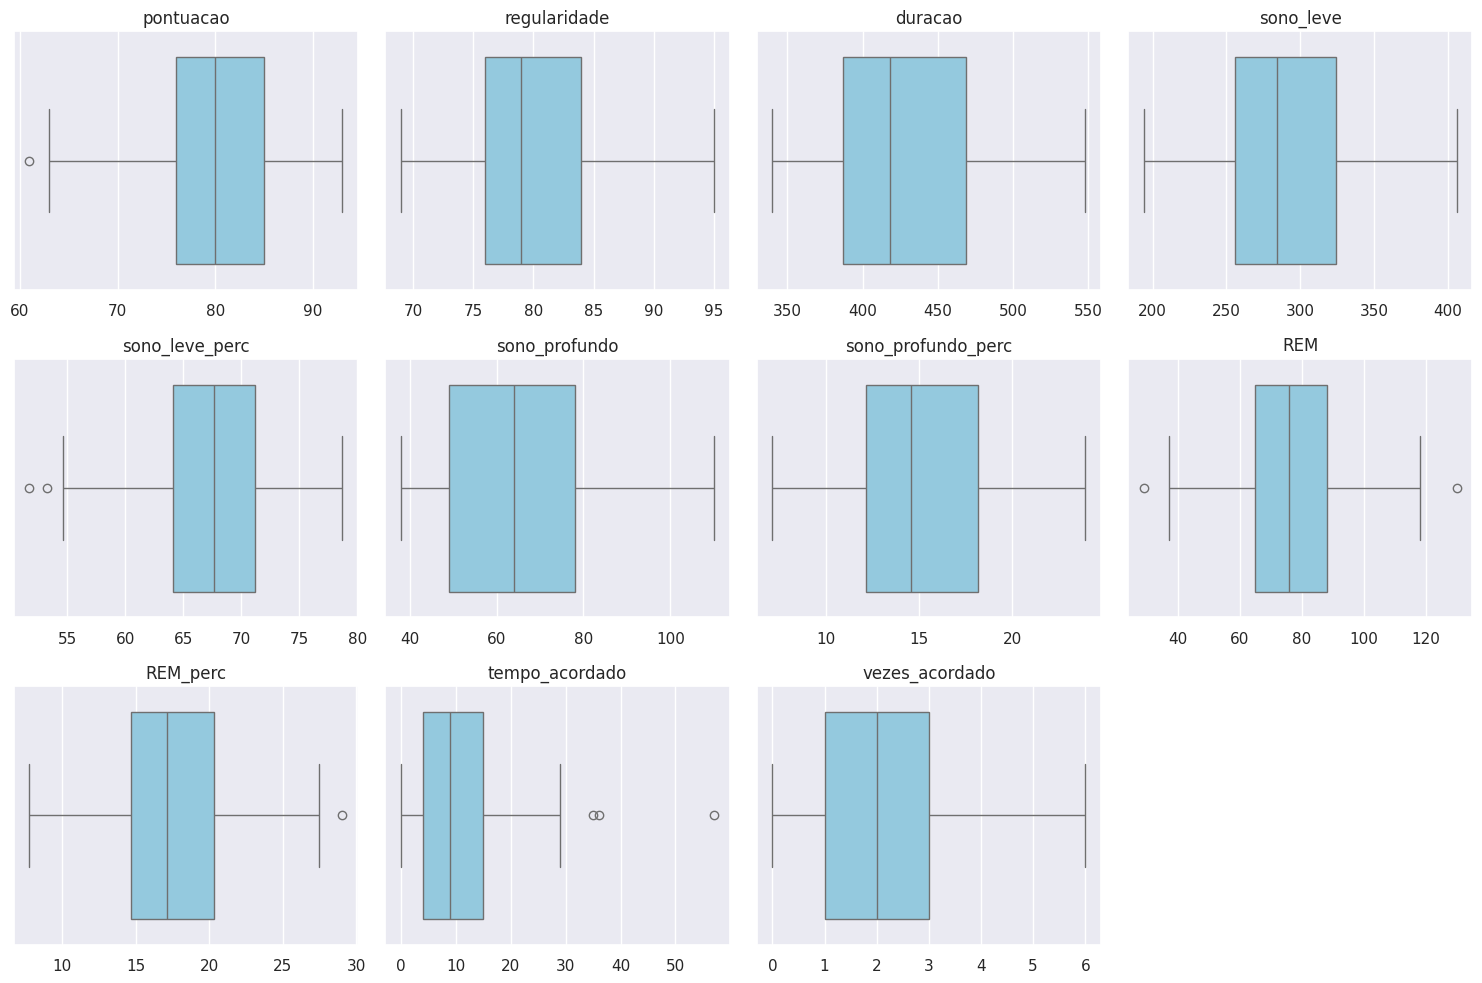

(<Figure size 1500x1000 with 11 Axes>,
 array([<Axes: title={'center': 'pontuacao'}>,
        <Axes: title={'center': 'regularidade'}>,
        <Axes: title={'center': 'duracao'}>,
        <Axes: title={'center': 'sono_leve'}>,
        <Axes: title={'center': 'sono_leve_perc'}>,
        <Axes: title={'center': 'sono_profundo'}>,
        <Axes: title={'center': 'sono_profundo_perc'}>,
        <Axes: title={'center': 'REM'}>,
        <Axes: title={'center': 'REM_perc'}>,
        <Axes: title={'center': 'tempo_acordado'}>,
        <Axes: title={'center': 'vezes_acordado'}>, <Axes: >], dtype=object))

In [8]:
criar_boxplot(dataframe=data, metricas=metricas, title="Box Plot")

In [9]:
outliers = ["pontuacao", "sono_leve_perc", "REM", "REM_perc", "tempo_acordado"]

Visualização de outliers 

Utilização de Scater Plot para visualizar dados

Utilização de Line Plot para visualizar Linha Inferior, Linha Superior e Média

In [ ]:
for outlier in outliers:
    Q1 = data[outlier].quantile(0.25)
    Q3 = data[outlier].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_mask = (data[outlier] < limite_inferior) | (data[outlier] > limite_superior)
    outliers_df = data[outliers_mask].copy()
    non_outliers_df = data[~outliers_mask].copy()

    print(f"\nAnálise de Outliers - {outlier}")
    print(f"• Primeiro Quartil (Q1): {Q1:.2f}")
    print(f"• Terceiro Quartil (Q3): {Q3:.2f}")
    print(f"• IQR: {IQR:.2f}")
    print(f"• Limite Inferior: {limite_inferior:.2f}")
    print(f"• Limite Superior: {limite_superior:.2f}")
    print(f"• Outliers Detected: {len(outliers_df)}")

    plt.figure(figsize=(12, 6))

    media = data[outlier].mean()

    sns.scatterplot(x=non_outliers_df.index, y=non_outliers_df[outlier], color="skyblue", label="Normal", s=80)
    sns.scatterplot(x=outliers_df.index, y=outliers_df[outlier], color="red", label="Outliers", s=100) 
    plt.axhline(limite_superior, color="red", linestyle="--")
    plt.axhline(limite_inferior, color="red", linestyle="--")
    plt.axhline(media, color="green", linestyle="--")

    plt.title(f"Distribuição de {outlier.capitalize()} com Outliers em destaque")
    plt.xlabel("Index")
    plt.ylabel(outlier)
    plt.legend()
    plt.tight_layout()
    plt.show()

Visualização de Histogramas

In [ ]:
for metrica in metricas:
  plt.figure(figsize=(16, 8))
  sns.histplot(data=data, x=metrica, kde=True)

Visualização de Violin Plot

In [ ]:
figsize = (12, 1.2 * len(data['dia_semana'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='pontuacao', y='dia_semana', inner='stick', palette='Dark2', hue='dia_semana', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

In [ ]:
media_pontuacao = data["pontuacao"].mean()
media_pontuacao

Visualização geral de Pontuação e linha de média

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x="data", y="pontuacao")
plt.axhline(media_pontuacao, color="red", linestyle="--")
plt.ylabel("Pontuação")
plt.xticks(rotation=90)
plt.xlabel("Data")
plt.show()

Gráfico de Correlação

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(data[metricas].corr(),  annot=True, cmap="coolwarm", center=0)
plt.title("Correlação das Métricas")
plt.show()

Utilização de Bar Plot (Stacked) para visualizar como está composta a duração do sono 

In [ ]:
composicao_sono = ["sono_leve", "sono_profundo", "REM"]

In [ ]:

volume = data.groupby("data")[composicao_sono].sum()

ax = volume.plot(
    kind="bar",
    stacked=True,
    figsize=(20, 10),
    colormap="viridis",
)
plt.title("Composição do Sono")
plt.xlabel("Dia")
plt.ylabel("Tempo (min)")
# plt.xticks(rotation=45, ha="right")
plt.legend(title="Etapas")

plt.tight_layout()
plt.show()



In [ ]:
total_sono = data[["sono_leve", "sono_profundo", "REM"]].sum()
labels = total_sono.index.tolist()
values = total_sono.values.tolist()

In [ ]:
plt.figure(figsize=(16,8))
plt.pie(
    values,
    labels=labels,
    autopct="%1.2f%%",
    startangle=90,
)
plt.title("Composição Total do Sono Registrado")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [ ]:
ordem = ["segunda-feira", "terça-feira", "quarta-feira", "quinta-feira", "sexta-feira",
         "sábado", "domingo"]

In [ ]:
data_semana = data.copy()

In [ ]:
data_semana["dia_semana"] = pd.Categorical(data_semana["dia_semana"], categories=ordem, ordered=True)

In [ ]:
medias = data_semana.groupby("dia_semana")["pontuacao"].mean().round(2)

In [ ]:
medias_df = medias.reset_index()
medias_df.columns = ["dia_semana", "pontuacao"]

In [ ]:
medias_df = medias_df.sort_values("pontuacao", ascending=True)

In [ ]:
medias_df

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(data=medias_df, x="dia_semana", y="pontuacao", order=medias_df["dia_semana"])
plt.title("Média de Pontuação por dia da Semana", size=16)
plt.xlabel("Dia da Semana", size=14)
plt.ylabel("Pontuação", size=14)
plt.tight_layout()
plt.show()

In [ ]:
# segunda = data.loc[data["dia_semana"] == "segunda-feira", "pontuacao"].tolist()
# terca = data.loc[data["dia_semana"] == "terça-feira", "pontuacao"].tolist()
# quarta = data.loc[data["dia_semana"] == "quarta-feira", "pontuacao"].tolist()
# quinta = data.loc[data["dia_semana"] == "quinta-feira", "pontuacao"].tolist()
# sexta = data.loc[data["dia_semana"] == "sexta-feira", "pontuacao"].tolist()
# sabado = data.loc[data["dia_semana"] == "sábado", "pontuacao"].tolist()
# domingo = data.loc[data["dia_semana"] == "domingo", "pontuacao"].tolist()

# import numpy as np

# media_segunda = np.mean(segunda)
# media_terca = np.mean(terca)
# media_quarta = np.mean(quarta)
# media_quinta = np.mean(quinta)
# media_sexta = np.mean(sexta)
# media_sabado = np.mean(sabado)
# media_domingo = np.mean(domingo)

In [ ]:
data_ordenado = data.sort_values(by="pontuacao", ascending=False)
maiores = data_ordenado.head(15)
menores = data_ordenado.tail(15)

In [ ]:
maiores_dias_semana = maiores["dia_semana"].value_counts()
maiores_dias_semana

In [ ]:
menores_dias_semana = menores["dia_semana"].value_counts()
menores_dias_semana

In [ ]:
maiores

In [ ]:
media_pontuacao_maiores = maiores["pontuacao"].mean().round(2)
media_duracao_maiores = maiores["duracao"].mean().round(2)
media_sono_leve_perc_maiores = maiores["sono_leve_perc"].mean().round(2)
media_sono_profundo_perc_maiores = maiores["sono_profundo_perc"].mean().round(2)
media_rem_perc_maiores = maiores["REM_perc"].mean().round(2)
media_tempo_acordado_maiores = maiores["tempo_acordado"].mean().round(2)
media_vezes_acordado_maiores = maiores["vezes_acordado"].mean().round(2)

In [ ]:
media_pontuacao_menores = menores["pontuacao"].mean().round(2)
media_duracao_menores = menores["duracao"].mean().round(2)
media_sono_leve_perc_menores = menores["sono_leve_perc"].mean().round(2)
media_sono_profundo_perc_menores = menores["sono_profundo_perc"].mean().round(2)
media_rem_perc_menores = menores["REM_perc"].mean().round(2)
media_tempo_acordado_menores = menores["tempo_acordado"].mean().round(2)
media_vezes_acordado_menores = menores["vezes_acordado"].mean().round(2)

In [ ]:
print("Média das Maiores 15 Pontuações registradas")
print("-------------------------------------------")
print(f"Pontuação: {media_pontuacao_maiores}")
print(f"Duração: {media_duracao_maiores}")
print(f"Sono Leve %: {media_sono_leve_perc_maiores}")
print(f"Sono Profundo %: {media_sono_profundo_perc_maiores}")
print(f"REM %: {media_rem_perc_maiores}")
print(f"Tempo acordado: {media_tempo_acordado_maiores}")
print(f"Vezes acordado: {media_vezes_acordado_maiores}")


In [ ]:
print("Média das Menores 15 Pontuações registradas")
print("-------------------------------------------")
print(f"Pontuação: {media_pontuacao_menores}")
print(f"Duração: {media_duracao_menores}")
print(f"Sono Leve (%): {media_sono_leve_perc_menores}")
print(f"Sono Profundo (%): {media_sono_profundo_perc_menores}")
print(f"REM (%): {media_rem_perc_menores}")
print(f"Tempo acordado: {media_tempo_acordado_menores}")
print(f"Vezes acordado: {media_vezes_acordado_menores}")
print("-------------------------------------------")

In [ ]:
print("Diferença entre as Maior e Menor")
print("--------------------------------")
print(f"Pontuação: {media_pontuacao_maiores - media_pontuacao_menores:.2f}")
print(f"Duração: {media_duracao_maiores - media_duracao_menores:.2f}")
print(f"Sono Leve (%): {media_sono_leve_perc_maiores - media_sono_leve_perc_menores:.2f}")
print(f"Sono Profundo (%): {media_sono_profundo_perc_maiores - media_sono_profundo_perc_menores:.2f}")
print(f"REM (%): {media_rem_perc_maiores - media_rem_perc_menores:.2f}")
print(f"Tempo acordado: {media_tempo_acordado_maiores - media_tempo_acordado_menores:.2f}")
print(f"Vezes acordado: {media_vezes_acordado_maiores - media_vezes_acordado_menores:.2f}")
print("--------------------------------")